# Лабораторная работа №2. Критерии согласия и однородности выборок

> Вариант № ??

**Распределения**:

X ~ ?? (объём выборки $n_x$ &mdash; ?)

Y ~ ?? (объём выборки $n_y$ &mdash; ?)

In [86]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

# Немного магии для того, чтобы рисунки стали больше
import pylab
pylab.rcParams['figure.figsize'] = (24.0, 16.0)
plt.rcParams.update({'font.size': 32})

# Вспомогательные классы и функции, определённые тут же (см. репозиторий)
# https://github.com/BobNobrain/matstat-labs/tree/master/s
from s import Sample
from s.utils import table

## Задание переменных и генерация выборок

In [87]:
nx = 100
ny = 100

X = stats.chi2(15)
Y = stats.uniform(5, 20)

# Пример использования класса Sample для получения выборки из заданного распределения
x = Sample.from_distribution("x", X, count=nx)
y = Sample.from_distribution("y", Y, count=ny)
# Альтернатива: X.rvs(size=nx) - массив случайных чисел из заданного распределения

# Вспомогательный метод класса s.Sample
x.describe()
y.describe()

# Отрисовка таблицы: массив заголовочных ячеек, массив строк таблицы
table(
    ['Распределение', 'Параметры', '$m$', '$\\sigma^2$'],
    [
        ['$X^2$', 'k=15', X.mean(), X.var()],
        ['R', 'a=5, b=25', Y.mean(), round(Y.var(), 4)]
    ]
)

Sample x: m=14.307025266630328, s=5.661253532015527, s^2=32.04979155375828
Sample y: m=14.384641222871174, s=5.426477045457404, s^2=29.44665312487612


Распределение,Параметры,$m$,$\sigma^2$
$X^2$,k=15,15.0,30.0
R,"a=5, b=25",15.0,33.3333


## 1. Исходные данные

In [88]:
print('Характеристики СВ X:')

table(
    ['Распределение', 'Параметры', 'Мат. ожидание $m$', 'Дисперсия $\\sigma^2$'],
    [
        ['$X^2$', 'k=15', X.mean(), X.var()]
    ]
)

print('Характеристики выборки x')
table(
    ['Среднее, $\\overline{x}$', 'Оценка дисперсии, $s^2$', 'Оценка с.к.о., $s$'],
    [
        [round(x.mean(), 5), round(x.s() * x.s(), 5), round(x.s(), 5)]
    ]
)

Характеристики СВ X:


Распределение,Параметры,Мат. ожидание $m$,Дисперсия $\sigma^2$
$X^2$,k=15,15.0,30.0


Характеристики выборки x


"Среднее, $\overline{x}$","Оценка дисперсии, $s^2$","Оценка с.к.о., $s$"
14.30703,32.04979,5.66125


## 2. Визуальное представление выборки

Гистограммы частот для $n_{bins} \in \{5, 10, 15, n_{my}\}$ (выберите $n_{my}$ сами):

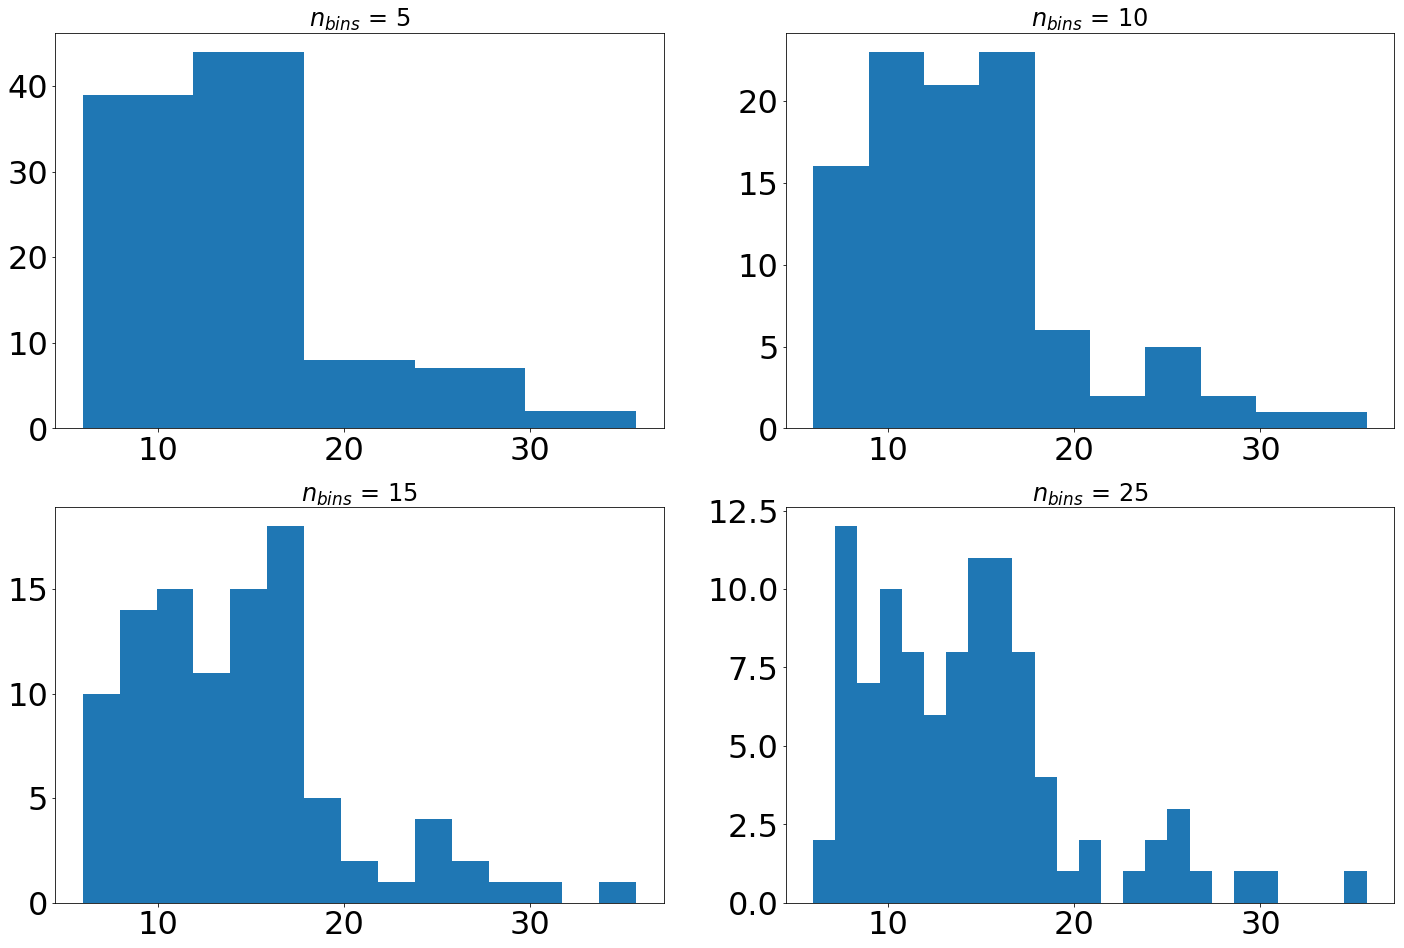

In [89]:
n_my = 25 # TODO: выбрать число
fig, axs = plt.subplots(2,2)

n_bins_values = [5, 10, 15, n_my]

for i in range(4):
    n_bins = n_bins_values[i]
    picture = axs[i // 2][i % 2]
    picture.hist(x.data(), bins=n_bins)
    picture.set_title('$n_{bins}$ = {}'.format(n_bins, bins='{bins}'), fontsize=24)

## 3. Критерий хи-квадрат

*а)* Статистическая гипотеза $H_0: X \sim N$

In [91]:
from s import Pierson1SampledHyp

alpha = 0.01
my_n = 25

proposed_dist = stats.norm(X.mean(), X.var())

def table_row(n):
    start = 0.
    end = 50.
    step = (end - start) / n

    h0 = Pierson1SampledHyp(
        bins=np.arange(start, end + step, step),
        unknown_params_n=2
    )
    criterion_v, critical_v, p_v, passed = h0.full_test(dist=proposed_dist, sample=x, alpha=alpha)
    
    decision = 'H0' if passed else 'H1'
    return [n, round(criterion_v, 4), round(p_v, 4), decision, 'Посчитайте сами']

table(
    [
        'Число интервалов группировки',
        'Выборочное значение статистики критерия',
        'p-value',
        'Статистическое решение при $\\alpha$ = {}'.format(alpha),
        'Ошибка статистического решения'
    ],
    [
        table_row(5),
        table_row(10),
        table_row(15),
        table_row(25)
    ]
)

Число интервалов группировки,Выборочное значение статистики критерия,p-value,Статистическое решение при $\alpha$ = 0.01,Ошибка статистического решения
5,210.4452,0.0,H1,Посчитайте сами
10,296.835,0.0,H1,Посчитайте сами
15,349.1201,0.0,H1,Посчитайте сами
25,360.9948,0.0,H1,Посчитайте сами


---

*б)* Статистическая гипотеза $H_0: X \sim R$

In [92]:
alpha = 0.1
my_n = 25

proposed_dist = stats.uniform(0, 50)

def table_row(n):
    start = 0.
    end = 50.
    step = (end - start) / n

    h0 = Pierson1SampledHyp(
        bins=np.arange(start, end + step, step),
        unknown_params_n=2
    )
    criterion_v, critical_v, p_v, passed = h0.full_test(dist=proposed_dist, sample=x, alpha=alpha)
    
    decision = 'H0' if passed else 'H1'
    return [n, round(criterion_v, 4), round(p_v, 4), decision, 'Посчитайте сами']

table(
    [
        'Число интервалов группировки',
        'Выборочное значение статистики критерия',
        'p-value',
        'Статистическое решение при $\\alpha$ = {}'.format(alpha),
        'Ошибка статистического решения'
    ],
    [
        table_row(5),
        table_row(10),
        table_row(15),
        table_row(25)
    ]
)

Число интервалов группировки,Выборочное значение статистики критерия,p-value,Статистическое решение при $\alpha$ = 0.1,Ошибка статистического решения
5,134.9,0.0,H1,Посчитайте сами
10,168.6,0.0,H1,Посчитайте сами
15,203.6,0.0,H1,Посчитайте сами
25,211.5,0.0,H1,Посчитайте сами


# ---

*в)* Статистическая гипотеза $H_0: X \sim \chi^2(5)$

In [93]:
alpha = 0.1
my_n = 20

proposed_dist = stats.chi2(5)

def table_row(n):
    start = 0.
    end = 20.
    step = (end - start) / n

    h0 = Pierson1SampledHyp(
        bins=np.arange(start, end + step, step),
        unknown_params_n=2
    )
    criterion_v, critical_v, p_v, passed = h0.full_test(dist=proposed_dist, sample=x, alpha=alpha)
    
    decision = 'H0' if passed else 'H1'
    return [n, round(criterion_v, 4), round(p_v, 4), decision, 'Посчитайте сами']

table(
    [
        'Число интервалов группировки',
        'Выборочное значение статистики критерия',
        'p-value',
        'Статистическое решение при $\\alpha$ = {}'.format(alpha),
        'Ошибка статистического решения'
    ],
    [
        table_row(5),
        table_row(10),
        table_row(15),
        table_row(25)
    ]
)

Число интервалов группировки,Выборочное значение статистики критерия,p-value,Статистическое решение при $\alpha$ = 0.1,Ошибка статистического решения
5,1183.1792,0.0,H1,Посчитайте сами
10,1344.8236,0.0,H1,Посчитайте сами
15,1375.3184,0.0,H1,Посчитайте сами
25,1407.4004,0.0,H1,Посчитайте сами


In [42]:
start = 0.
end = 20.
step = (end - start) / 20

hist_real, _ = np.histogram(x.data(), bins=np.arange(start, end + step, step))
hist_expected = hist_from_cdf(proposed_dist, bins=np.arange(start, end + step, step)) * x.n()
print(hist_real, hist_expected)
print(np.sum(
            (hist_real - hist_expected)**2 / hist_expected
        ))

NameError: name 'hist_from_cdf' is not defined

## 4. Критерий Колмогорова

In [94]:
alpha = 0.1
def index(quantiles, alpha, mode=0):
    ind = 0
    if mode:
        m = float("inf")
        for i, quantile in enumerate(quantiles):
            if m > abs(quantile[mode] - alpha):
                m = abs(quantile[mode] - alpha)
                ind = i
        return ind
    m = 1
    for i, quantile in enumerate(quantiles):
        if m > abs(quantile[mode] - (1 - alpha)):
            m = abs(quantile[mode] - (1 - alpha))
            ind = i
    return ind

def kolmogorov(domain, sample, proposed_dist, alpha = alpha):
    quantiles_kolmogorov = [(0.9, 1.224),
                             (0.95, 1.358),
                             (0.975, 1.48),
                             (0.99, 1.628),
                             (0.995, 1.731),
                             (0.999, 1.949),
                             (0.9995, 2.036)]
    
    ecdf = ECDF(sample.data())
    values = ecdf(domain)
    proposed_values = proposed_dist.cdf(domain)
    Dn = np.amax(abs(values - proposed_values))
    Zn = np.sqrt(sample.n()) * Dn
    i_critical = index(quantiles_kolmogorov, alpha)
    passed = Zn < quantiles_kolmogorov[i_critical][1]
    decision = 'H0' if passed else 'H1'
    p_value = 1 - quantiles_kolmogorov[index(quantiles_kolmogorov, Zn, 1)][0]
    return round(Zn, 5), round(p_value, 5), decision, ''

domain = np.linspace(x.min(), x.max(), x.n() * 2)
stats.norm(X.mean(), X.var())
table(
    [
        'Статистическая гипотеза $H_0$',
        'Выборочное значение статистики критерия',
        'p-value',
        'Статистическое решение при $\\alpha$ = {}'.format(alpha),
        'Ошибка статистического решения'
    ],
    [
        ['$X \\sim N(m, \\sigma)$', *kolmogorov(domain, x, stats.norm(X.mean(), X.var()))],
        ['$X \\sim R$', *kolmogorov(domain, x, stats.uniform(0, 50))],
        ['$X \\sim \\chi^2(5)$', *kolmogorov(domain, x, stats.chi2(5))]
    ]
)

Статистическая гипотеза $H_0$,Выборочное значение статистики критерия,p-value,Статистическое решение при $\alpha$ = 0.1,Ошибка статистического решения
"$X \sim N(m, \sigma)$",3.76877,0.0005,H1,
$X \sim R$,4.99672,0.0005,H1,
$X \sim \chi^2(5)$,7.71108,0.0005,H1,


In [95]:
def index(quantiles, alpha, mode=0):
    """Функция для получения ближайшего квантиля, в зависимости от уровня значимости alpha"""
    ind = 0
    if mode:
        m = float("inf")
        for i, quantile in enumerate(quantiles):
            if m > abs(quantile[mode] - alpha):
                m = abs(quantile[mode] - alpha)
                ind = i
        return ind
    m = 1
    for i, quantile in enumerate(quantiles):
        if m > abs(quantile[mode] - (1 - alpha)):
            m = abs(quantile[mode] - (1 - alpha))
            ind = i
    return ind

quantiles_kolmogorov = [(0.9, 1.224),
                             (0.95, 1.358),
                             (0.975, 1.48),
                             (0.99, 1.628),
                             (0.995, 1.731),
                             (0.999, 1.949),
                             (0.9995, 2.036)]
index(quantiles_kolmogorov, 1.4, 1)

1

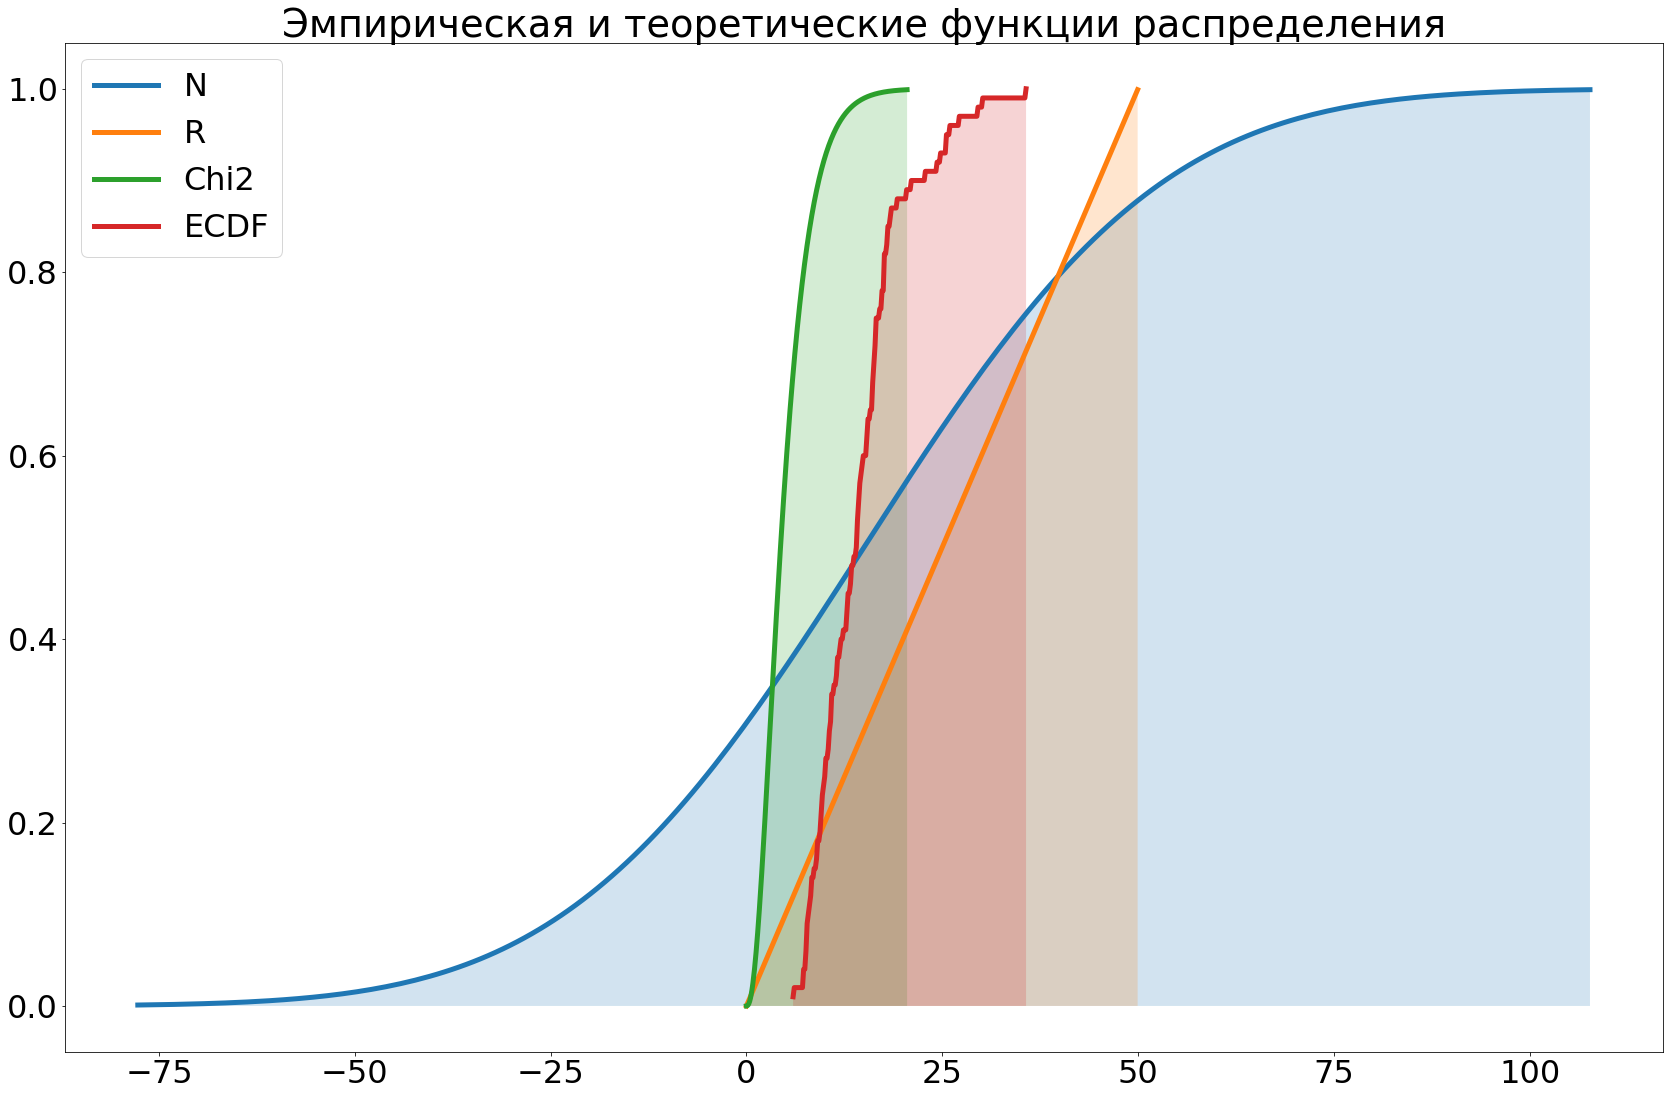

In [96]:
h0_distributions = [
    ('N', stats.norm(X.mean(), X.var())),
    ('R', stats.uniform(0, 50)),
    ('Chi2', stats.chi2(5))
]


fig, ax = plt.subplots()
ax.set_title('Эмпирическая и теоретические функции распределения')

for name, dist in h0_distributions:
    domain = np.linspace(
        min(0, dist.ppf(0.001)),
        max(5, dist.ppf(0.999)),
        200
    )
    values = dist.cdf(domain)
    ax.plot(domain, values, lw=5, label=name)
    ax.fill_between(domain, 0, values, alpha=.2)
    
ecdf = ECDF(x.data())
domain = np.linspace(x.min(), x.max(), x.n() * 2)
values = ecdf(domain)
ax.plot(domain, values, lw=5, label='ECDF')
ax.fill_between(domain, 0, values, alpha=.2)

ax.legend(prop={'size': 32})
    
fig.tight_layout()
plt.show()

# 5. Двухвыборочные критерии

In [97]:
print('Характеристики СВ Y:')
table(
    ['Распределение', 'Параметры', 'Мат. ожидание $m$', 'Дисперсия $\\sigma^2$'],
    [
        ['R', 'a=5, b=25', Y.mean(), round(Y.var(), 5)]
    ]
)

print('Характеристики выборки y')
table(['Среднее, $\\overline{x}$', 'Оценка дисперсии, $s^2$', 'Оценка с.к.о., $s$'],
      [
        [round(y.mean(), 5), round(y.s() * y.s(), 5), round(y.s(), 5)]
      ]
)

Характеристики СВ Y:


Распределение,Параметры,Мат. ожидание $m$,Дисперсия $\sigma^2$
R,"a=5, b=25",15.0,33.33333


Характеристики выборки y


"Среднее, $\overline{x}$","Оценка дисперсии, $s^2$","Оценка с.к.о., $s$"
14.38464,29.44665,5.42648


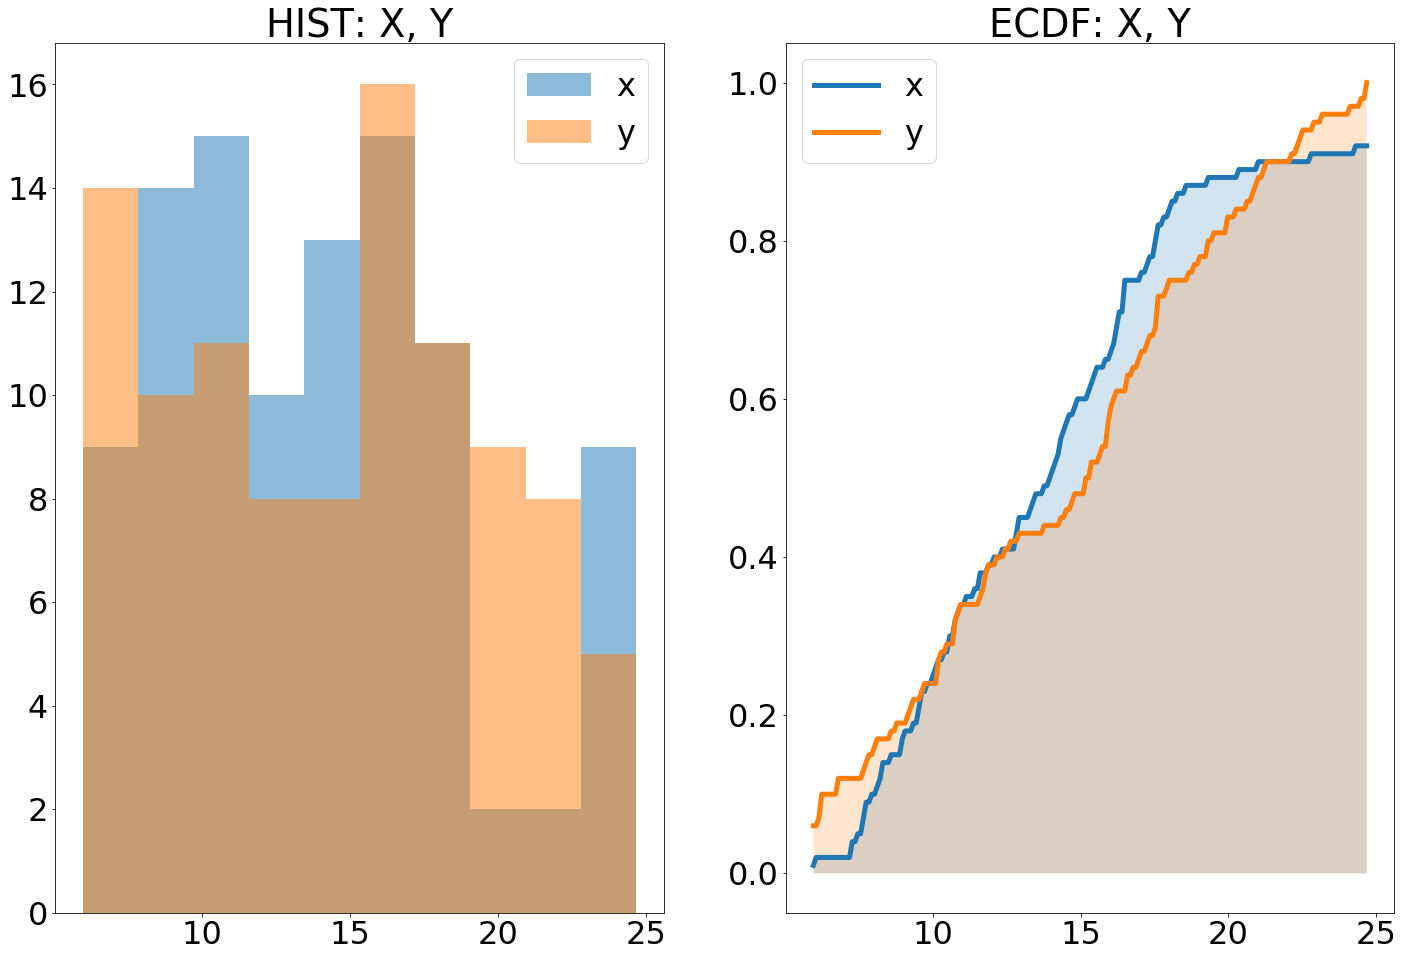

In [98]:
fig, ax = plt.subplots(1, 2)

left_plot = ax[0]
right_plot = ax[1]

min_val = max(x.min(), y.min())
max_val = min(x.max(), y.max())
clipped_x = np.clip(x.data(), min_val, max_val)
clipped_y = np.clip(y.data(), min_val, max_val)

left_plot.set_title('HIST: X, Y')
left_plot.hist(clipped_x, bins=10, label='x', alpha=.5)
left_plot.hist(clipped_y, bins=10, label='y', alpha=.5)
left_plot.legend()


right_plot.set_title('ECDF: X, Y');

# TODO: ECDF
domain = np.linspace(min_val, max_val, 200)
ecdf_x = ECDF(x.data())
ecdf_y = ECDF(y.data())
values_x = ecdf_x(domain)
values_y = ecdf_y(domain)
right_plot.plot(domain, values_x, lw=5, label='x')
right_plot.plot(domain, values_y, lw=5, label='y')
right_plot.fill_between(domain, 0, values_x, alpha=.2)
right_plot.fill_between(domain, 0, values_y, alpha=.2)

right_plot.legend(prop={'size': 32})
    
plt.show()

In [99]:
def kolmogorov_2(domain, sample1, sample2, alpha = alpha):
    quantiles_kolmogorov = [(0.9, 1.224),
                             (0.95, 1.358),
                             (0.975, 1.48),
                             (0.99, 1.628),
                             (0.995, 1.731),
                             (0.999, 1.949),
                             (0.9995, 2.036)]
    
    ecdf_x = ECDF(sample1.data())
    ecdf_y = ECDF(sample2.data())
    values_x = ecdf_x(domain)
    values_y = ecdf_y(domain)
    Dn = np.amax(abs(values_x - values_y))
    Zn = np.sqrt(sample1.n() * sample2.n() / (sample1.n() + sample2.n())) * Dn
    i_critical = index(quantiles_kolmogorov, alpha)
    passed = Zn < quantiles_kolmogorov[i_critical][1]
    decision = 'H0' if passed else 'H1'
    p_value = 1 - quantiles_kolmogorov[index(quantiles_kolmogorov, Zn, 1)][0]
    return round(Zn, 5), round(p_value, 5), decision

In [100]:
def norm_val(clipped_x, clipped_y, min_val, max_val):
    clipped_x_ = list(clipped_x)
    clipped_y_ = list(clipped_y)
    for _ in range(clipped_x_.count(min_val)):
        i = clipped_x_.index(min_val)
        clipped_x_.pop(i)
        clipped_y_.pop(i)
    for _ in range(clipped_x_.count(max_val)):
        i = clipped_x_.index(max_val)
        clipped_x_.pop(i)
        clipped_y_.pop(i)
    for _ in range(clipped_y_.count(min_val)):
        i = clipped_y_.index(min_val)
        clipped_x_.pop(i)
        clipped_y_.pop(i)
    for _ in range(clipped_y_.count(max_val)):
        i = clipped_y_.index(max_val)
        clipped_x_.pop(i)
        clipped_y_.pop(i)
    return np.array(clipped_x_), np.array(clipped_y_)

In [101]:
def sign_test(sample1, sample2, alpha=alpha):
    couples = zip(sample1.data(), sample2.data())
    signs = [c[0] - c[1] for c in couples if c[0] != c[1]]
    h = len(list(filter(lambda s: s > 0, signs))) / len(signs)
    Z = 2 * np.sqrt(len(signs)) * (h - 0.5)
    F = stats.norm(0, 1)
    p_value = min(F.cdf(Z), 1 - F.cdf(Z)) / 2
    z_critical = F.ppf(1 - alpha / 2)
    deccision = 'H0' if abs(Z) < z_critical else 'H1'
    return round(Z, 5), round(p_value, 5), deccision

In [102]:
def u_test(sample1, sample2, alpha = alpha):
    nx = len(sample1)
    ny = len(sample2)
    Rx = np.sum(sample1.ranks())
    Ux = nx * ny  + nx * (nx + 1) / 2 - Rx
    Z = (Ux - nx * ny / 2) / (np.sqrt(nx * ny * (nx + ny + 1) / 12))
    F = stats.norm(0, 1)
    p_value = min(F.cdf(Z), 1 - F.cdf(Z)) / 2
    deccision = 'H0' if abs(Z) < F.ppf(1 - alpha / 2) else 'H1'
    return round(Z, 5), round(p_value, 5), deccision

In [103]:
from s import Pierson2SampledHyp
alpha = 0.01

start = 5
end = 25
step = (end - start) / 10

h0 = Pierson2SampledHyp(
        bins=np.arange(start, end + step, step)
    )

chi2_test = h0.full_test(x, y, alpha)
chi2_deccision = 'H0' if chi2_test[3] else 'H1' 

table(
    [
        'Критерий',
        'Статистическая гипотеза $H_0$',
        'Выборочное значение статистики критерия',
        'p-value',
        'Статистическое решение при $\\alpha$ = {}'.format(alpha),
        'Ошибка статистического решения'
    ],
    [
        ['Chi-squared', '$X^2(15)(X)$ = $R(5, 25)(Y)$', round(chi2_test[0], 5), round(chi2_test[2], 5), chi2_deccision, ''],
        ['KS-test', '$X^2(15)(X)$ = $R(5, 25)(Y)$', *kolmogorov_2(np.linspace(start, end, 200), x, y, alpha), ''],
        ['Sign test', '$X^2(15)(X)$ = $R(5, 25)(Y)$', *sign_test(x, y, alpha), ''],
        ['U-test', '$X^2(15)(X)$ = $R(5, 25)(Y)$', *u_test(x, y, alpha), '']
    ]
)

Критерий,Статистическая гипотеза $H_0$,Выборочное значение статистики критерия,p-value,Статистическое решение при $\alpha$ = 0.01,Ошибка статистического решения
Chi-squared,"$X^2(15)(X)$ = $R(5, 25)(Y)$",25.72453,0.00227,H1,
KS-test,"$X^2(15)(X)$ = $R(5, 25)(Y)$",0.91924,0.1,H0,
Sign test,"$X^2(15)(X)$ = $R(5, 25)(Y)$",0.4,0.17229,H0,
U-test,"$X^2(15)(X)$ = $R(5, 25)(Y)$",12.21694,0.0,H1,
